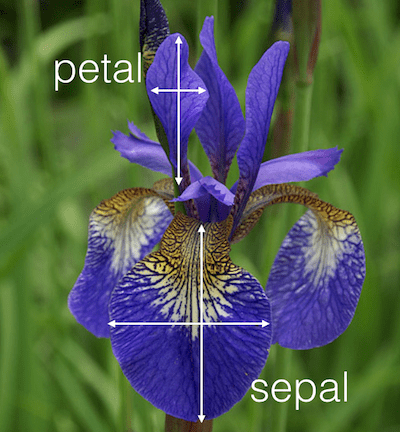

### Importing libraries

In [49]:
# loading libraryes
import sys
import pandas as pd
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
print(f"Matplotlib: {matplotlib.__version__}")

Matplotlib: 3.2.1


### Dowload and set a dataset

In [3]:
# load dataset from URL address to CSV file and giving the name for each column with parameters.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

### Dataset analysis

In [4]:
# analysis a dataset to view its more detailed.

# Dataset dimension
print(dataset.shape)
print(50 * "-")

# Viewing a slice of data
print(dataset.head())
print(50 * "-")

# Statistical summary
print(dataset.describe())
print(50 * "-")

# Data breakdown by class attribute
print(dataset.groupby('class').size())
#! .groupby().size() - Number of rows in each group as a Series
print(50 * "-")

(150, 5)
--------------------------------------------------
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
--------------------------------------------------
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.80

### Dataset visualization

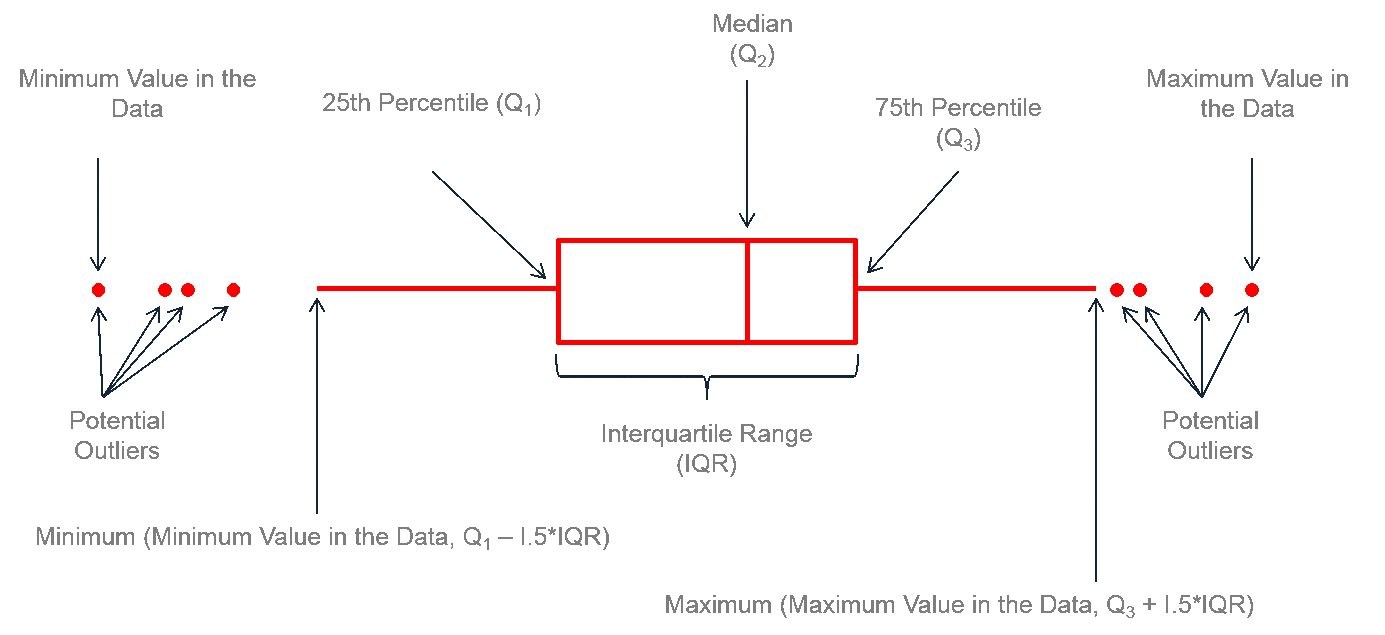

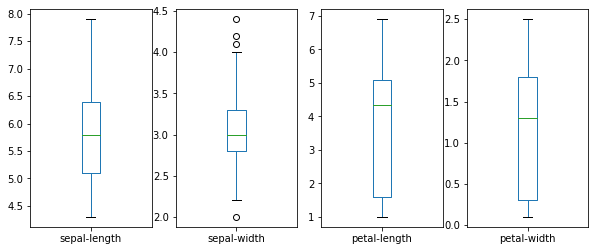

In [17]:
dataset.plot.box(figsize=(10,4), subplots=True)
plt.show()

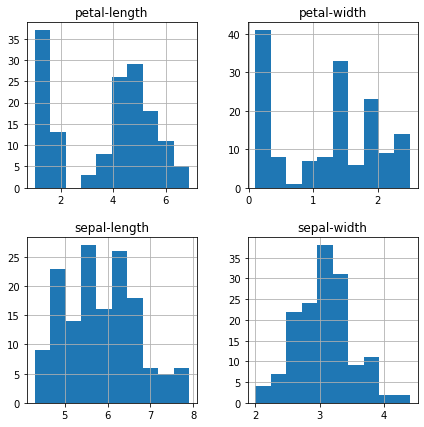

In [13]:
dataset.hist(figsize=(7,7))
plt.show()

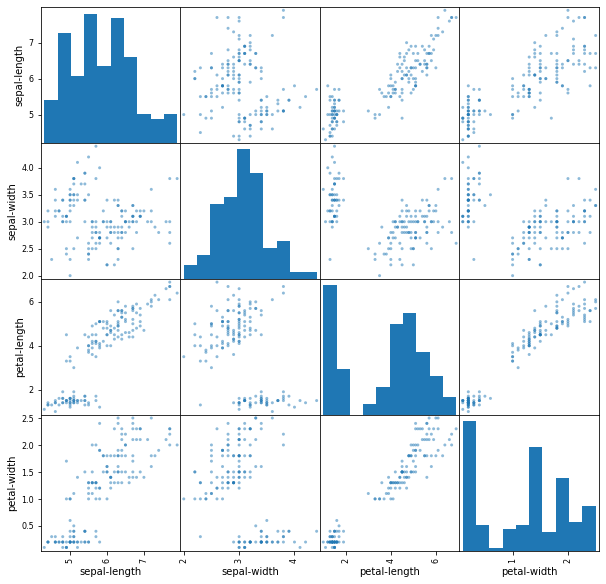

In [29]:
# At now we'll can see correlation of variables
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, figsize=(10,10))
plt.show()

### Algorithms evaluation

In [69]:
# Dividing dataset into training and control samples.
array = dataset.values

# Selecting the first four columns.
X = array[:,:4]

# Selecting the fifth column
y = array[:,4]

# Dividing X and y into training and control samples.
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

"""
Cross-validation:
    Using cross validation, the test sample is emulated which doesn't participate in training, but for which correct answers are known.
"""

### Building a machine learning model

Логистическая регрессия или логит-модель (LR)  
Линейный дискриминантный анализ (LDA)  
Метод k-ближайших соседей (KNN)  
Классификация и регрессия с помощью деревьев (CART)  
Наивный байесовский классификатор (NB)  
Метод опорных векторов (SVM)  

In [112]:
# Importing the needed modules.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Loading the model algorithms.
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# We evaluation a model on each iteration.
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

LR: 0.9416666666666667 (0.06508541396588878)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9583333333333333 (0.04166666666666669)
CART: 0.9416666666666667 (0.05335936864527374)
NB: 0.95 (0.05527707983925667)
SVM: 0.9833333333333332 (0.03333333333333335)


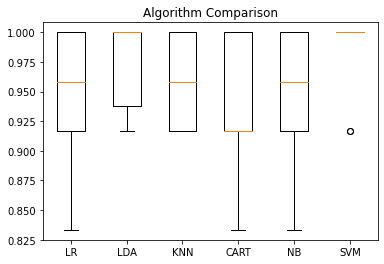

In [113]:
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

### Data forcasting
Before we are start forcasting anything, we need to select forcasting algorithm.  
We select a `SVM` model as most accuracy.  

At now we want to get an idea of the accuracy of the model on our a control data sample.

In [126]:
# We create a forcast on the control sample.
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [147]:
# Evaluate our forcast.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(Y_validation, predictions))
print("-" * 50)
print(confusion_matrix(Y_validation, predictions))
print("-" * 50)
print(classification_report(Y_validation, predictions))

0.9666666666666667
--------------------------------------------------
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
--------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Summary

Now, we are see that accuracy is 0.96% on the control sample.  

Confusion Matrix gives an idea about one mistake.

At finally, classification report provides a breakdown of each class by:
- precision
- recall
- f1-score